<a/ id='top'></a>

### Homework 1: Exploratory Data Analysis and Data Cleaning
***

**Name**: Tanner Bobak

***

This assignment is due on Moodle by **12 PM noon on Friday 8 June**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.   

**NOTES**: 

- Unless a URL is given for a data set, you will find the required data on Piazza in the Resources tab, under the Data section.
- If you are not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  There is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Piazza on writing math in Markdown. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. It is always advisable to do what you can to make the person grading your work happy :)

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

<br>

<a/ id='p1'></a>
[Back to top](#top)
*** 
### [10 pts] Problem 1

Dan has just finished baking a bunch of cookies for his wonderful friends. But, because he is also a good friend, he wants to test the cookies to estimate how delicious they are.  After all, if he baked gross cookies, he probably shouldn't give them to his friends, right?

In Dan's batch, there are 50 chocolate chip, 20 oatmeal raisin, 20 macadamia nut and 10 snickerdoodle cookies.  To estimate the deliciousness of the batch, Dan randomly selects 10 cookies and tastes them.  Dan is quite methodical, so he has a log of all of the cookies he has baked, and he intentionally selects 5 chocolate chip, 2 oatmeal raisin, 2 macadamia nut and 1 snickerdoodle cookie from his log to test.

Identify the following: 

- the population 
- the sample frame 
- the sample 
- the type of sample 
- the quantity of interest

Answer:

The **population** is the fifty cookies in Dan's batch.

The **sample frame** is log of all the cookies that Dan has baked.

The **sample** is the ten cookies that Dan selects to try.

The **type of sample** is stratified, sampling every 10th cookie in each homogenous group.

The **quantity of interest** is how delicious the cookies are, presumably on some rating scale such as 1-10. However he may be using the ISO 7457-E cookie rating standard which assigns cookie deliciousness on a logarithmic scale. ;P

<br>

<a/ id='p2'></a>
[Back to top](#top)
*** 
### [20 pts] Problem 2 

A method to investigate the sensitivity of the sample mean and the sample median to extreme outliers is to replace one or more elements in a given dataset by a number $y$ and investigate the eﬀect when $y$ goes to inﬁnity. To illustrate this, consider the dataset

$$
4.6 \quad 
5.0 \quad
6.5 \quad
7.2 \quad
4.2 \quad
3.0 \quad
6.6
$$

**Part A**: Compute the sample mean and sample median.


In [27]:
# Data
pt2_data = np.array([4.6,5.0,6.5,7.2,4.2,3.0,6.6], dtype=float)

# Print the mean
print("{} is the mean.".format(np.mean(pt2_data)))

# Print the meadian
print("{} is the median.".format(np.median(pt2_data)))

5.3 is the mean.
5.0 is the median.


**Part B**: We replace the element $5.0$ by some real number $z$. What happens with the sample mean and the sample median of this new dataset as $z \rightarrow \infty$?

Answer:

As $z \rightarrow \infty$, the sample mean will increase towards infinity as well. The sample median will be $z$ for $z < 6.6$, and then change to $6.5$ for $z > 6.5$.

**Part C**: We replace a number of elements by some real number $z$. How many elements do we need to replace so that the sample median of the new dataset goes to infinity as $z \rightarrow \infty$?

Answer:

The four largest elements must be replaced by $z$ for the sample median to tend toward infinity as $z \rightarrow \infty$. 

**Part D**: Suppose we have another data set of size $n$. How many elements do we need to replace by some real number $z$, so that the sample mean of the new dataset diverges as $z \rightarrow \infty$? And how many elements do we need to replace, so that the sample median of the new dataset goes to infinity? 

Answer:

For a data set of size $n$, only one number must be replaced by $z$ for the sample mean to diverge as $z \rightarrow \infty$. On the other hand, the $\left \lceil{\frac{n}{2}} \right \rceil$ largest elements must be replaced for the sample median to diverge as $z \rightarrow \infty$.

<br>

<a/ id='p3'></a>
[Back to top](#top)
*** 
### [35 pts] Problem 3 

Let $x_1, x_2, \ldots, x_n$ be $n$ observations of a variable of interest.  Recall that the sample mean $\bar{x}_n$ and sample variance $s^2_n$ are given by 

$$
\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \quad \textrm{and} \quad s^2_n = \frac{1}{n-1}\sum_{k=1}^n \left( x_k - \bar{x}_n\right)^2
$$

where here the subscript $n$'s indicate the number of observations in the sample. Notice that a natural computation of the variance requires two passes over the data: one to compute the mean, and a second to subtract the mean from each observation and compute the sum of squares. It is often useful to be able to compute the variance in a single pass, inspecting each value $x_k$ only once; for example, when the data are being collected without enough storage to keep all the values, or when costs of memory access dominate those of computation. In this problem you will explore two methods for such an _online_ computation of the mean and variance.  

**Part A**: Show algebraically that the following relation holds between the mean of the first $n-1$ observations and the mean of all $n$ observations: 

$$
\bar{x}_n = \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n}
$$

Answer:

$\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k \implies \bar{x}_{n-1} = \frac{1}{n-1}\sum_{k=1}^{n-1} x_k$

$\bar{x}_n = \frac{1}{n}\sum_{k=1}^n x_k = \bar{x}_n = \frac{1}{n} \left[ \left( \sum_{k=1}^{n-1} x_k \right) + x_n \right]$

$= \frac{1}{n} \left[ \left( (n-1)\bar{x}_{n-1} \right) + x_n \right]$

$= \frac{(n-1)\,\bar{x}_{n-1}}{n} + \frac{x_n}{n}$

$= \frac{n\,\bar{x}_{n-1}}{n} - \frac{\bar{x}_{n-1}}{n} + \frac{x_n}{n}$

$= \bar{x}_{n-1} + \frac{x_n - \bar{x}_{n-1}}{n} \quad \mathrm{\blacksquare}$ 

**Part B**: Write a function `my_sample_mean` that takes as its input a numpy array and returns the mean of that numpy array using the formulas from class (written above). Write another function `my_sample_var` that takes as its input a numpy array and returns the variance of that numpy array, again using the formulas from class (written above). You may **not** use any built-in sample mean or variance functions.

In [28]:
def my_sample_mean(arr):
    """
    Calculate the sample mean using the formula learned in class.
    """
    
    # Length of array
    n = len(arr)
    
    # Accumulate sum 
    my_sum = 0
    
    # The summation (does not use built-in functions)
    for i in range(0,n):
        my_sum += arr[i]
        
    # Divide the sum by n
    return my_sum / n

def my_sample_var(arr):
    """
    Calculate the sample variance using the formula learned in class.
    """
    
    # Length of array
    n = len(arr)
    
    # Get the sample mean using the previously defined function
    xbar = my_sample_mean(arr)
    
    # Accumulator
    my_sum = 0
    
    # Perform the summation
    for i in range(0,n):
        my_sum += (arr[i] - xbar)**2
        
    # Divide the sum by n-1
    return my_sum / (n - 1)

**Part C**: Use your functions from Part B to compute the sample mean and sample variance of the following array of bicycle ride lengths.

`ride_lengths = [25, 23, 12, 38, 6, 6, 28, 45, 64, 17, 20, 100]`

In [29]:
# Ride lengths as a numpy array
ride_lengths = np.array([25, 23, 12, 38, 6, 6, 28, 45, 64, 17, 20, 100])

# Print results of my functions
print("my_sample_mean: {}".format(my_sample_mean(ride_lengths)))
print("my_sample_var: {}".format(my_sample_var(ride_lengths)))

# Print results of built in functions to verify
print("numpy mean: {}".format(ride_lengths.mean()))
print("numpy var: {}".format(ride_lengths.var(ddof = 1))) # DDOF=1 adds makes the leading coeff 1/(n-1)

my_sample_mean: 32.0
my_sample_var: 738.1818181818181
numpy mean: 32.0
numpy var: 738.1818181818181


**Part D**: Implement a third function called `update_mean` that implements the formula whose validity you proved in Part A. (Note: this function will need to take as its input three things: $x_n$, $\bar{x}_{n-1}$ and $n$.)

Use this function to compute the values that you get from taking the mean of the first one ride, the first two rides, the first three rides, and so on up to all the bike rides. Store your ride length means in a numpy array called `rolling_means`.  Report all 12 estimates in `rolling_means`.

In [30]:
# Function definition
def update_mean(xn, xn1, n):
    return xn1 + (xn - xn1)/n

# Save length
n = len(ride_lengths)

# Allocate array
rolling_means = np.zeros(n)

# Handle case where there is no "n-1" element, the start of the recurrence.
rolling_means[0] = ride_lengths[0]

# Calculate
for i in range(1,n):
    rolling_means[i] = update_mean(ride_lengths[i], rolling_means[i-1], i+1)

# Display results with Pandas
data = {"Rolling Means": rolling_means}
df = pd.DataFrame(data)
df


,Rolling Means
0,25.000000
1,24.000000
2,20.000000
3,24.500000
4,20.800000
5,18.333333
6,19.714286
7,22.875000
8,27.444444
9,26.400000


**Part E:** There is a similar relation for an online update of the variance. This relation between the variance of the first $n-1$ observations and the variance of all $n$ observations is:

$$
s^2_n = \frac{(n-2)}{(n-1)}s^2_{n-1} + \frac{(x_n - \bar{x}_{n-1})^2}{n}
$$

Implement a function called `update_var` that implements this update for the variance.  Note that the function will require four things as input: $\bar{x}_{n-1}$, $s^2_{n-1}$, $x_n$ and $n$. You may start the recurrence with $s^2_1 = 0$.

Then, use this function to compute the values that you get for the variance of the first two rides, the first three rides, and so on up to all of the bike rides. Store your ride length variances in a numpy array called `rolling_vars`. Report all variance estimates from `rolling_vars`, and be sure your final estimate using all of the data agrees with your answer from **Part C**.

In [31]:
# Function definition
def update_var(xn, xn1, n, sn1):
    return ( (n - 2) / (n - 1) ) * sn1 + ( ((xn - xn1) ** 2) / n )

# Save length
n = len(ride_lengths)

# Allocate array
rolling_vars = np.zeros(n)
rolling_means = np.zeros(n)

# Start of recurrence
rolling_vars[0] = 0
rolling_means[0] = ride_lengths[0]

# Calculate
for i in range(1,n):
    rolling_means[i] = update_mean(ride_lengths[i], rolling_means[i-1], i+1)
    rolling_vars[i] = update_var(ride_lengths[i], rolling_means[i-1], i+1, rolling_vars[i-1])

# Display results with Pandas
data = {"Rolling Means": rolling_means,
        "Rolling Vars" : rolling_vars}
df = pd.DataFrame(data)
df

,Rolling Means,Rolling Vars
0,25.000000,0.000000
1,24.000000,2.000000
2,20.000000,49.000000
3,24.500000,113.666667
4,20.800000,153.700000
5,18.333333,159.466667
6,19.714286,146.238095
7,22.875000,205.267857
8,27.444444,367.527778
9,26.400000,337.600000


<br>

<a/ id='p4'></a>
[Back to top](#top)
*** 
### [35 pts] Problem 4

Some claim that the final hours aboard the RMS Titanic were marked by class warfare; others claim it was characterized by male chivalry.  We have the data on survival rates by class and by sex, so let's figure out whether there is evidence for these scenarios.

Access the dirty Titanic data in [`titanic_data.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jhz5hca2axb6zw) (linked here) and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival of passengers (**Survived**), and gender (**Sex**), among others.

Please make sure you do **NOT** accidentally use the `clean_titanic_data.csv` data set from the first in-class notebook.

In [32]:
# Two different paths to the data
# Modify the `local path` to wherever it lives on your machine
local_path = '../data/titanic_data.csv'
web_path = 'https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jhz5hca2axb6zw'

# Select the path that works for you 
file_path = web_path 

# Load the data into a DataFrame 
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**: Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?

Answer:

If there was extensive class warfare, then we could expect a higher number of high class people relative to low class people to have survived because the safety of the high class would be prioritized over those of lower classes.

If there was extensive male chivalry, then we could expect a higher number of females to have survived relative to males because the males would have let or helped the females get to safety first.

These patterns are not mutually exclusive; both can be observed simultaneously. If they were both observed, we could expect high class women to have the highest survival rate.

**Part B**: Create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. 

Also, answer these questions and display any relevant codes:
1. How many rows were in the original DataFrame?
2. How many rows are in the cleaned DataFrame?

In [33]:
original_rows = len(df) # Store number of original rows

# Remove values that are not 1 or 0.
dfTitanic = df.loc[(df['Survived'] == 1) | (df['Survived'] == 0)]

# Remove values where the class is not between 1 and 3 (inclusive).
dfTitanic = dfTitanic.loc[(dfTitanic['Pclass'] <= 3) & (dfTitanic['Pclass'] > 0)]

# Remove values where the age is not positive.
dfTitanic = dfTitanic.loc[dfTitanic['Age'] > 0]

# Remove values with missing sex.
dfTitanic = dfTitanic.loc[(dfTitanic['Sex'] == 'male') | (dfTitanic['Sex']== 'female')]
clean_rows = len(dfTitanic)

print("Original Rows: {}".format(original_rows))
print("Cleaned Rows: {}".format(clean_rows))

Original Rows: 891
Cleaned Rows: 714


**Part C**: Determine the fraction of survivors from each passenger class. Round your answers to **3 decimal places**.

In [34]:
# Filter out the survivors
survivors = dfTitanic[dfTitanic['Survived'] == 1]

# Calculate
for c in range(1,4):
    s = len(survivors.loc[survivors['Pclass'] == c])
    print("Fraction of survivors in class {0}: {1:.3f}".format(c, s/len(survivors)))

Fraction of survivors in class 1: 0.381
Fraction of survivors in class 2: 0.237
Fraction of survivors in class 3: 0.381


**Part D**: Compute the fraction of survivors according to class and gender.  Did men in first class or women in third class have a higher survival rate? 

Note that there are 6 class-gender combinations to report survival fractions for.

In [35]:
for sex in ['male', 'female']: # Iterate through the sexes
    for cl in range(1,4): # Iterate through the classes
        s = len(survivors.loc[(survivors['Pclass'] == cl) & (survivors['Sex'] == sex), ['Pclass', 'Sex']])
        print("Fraction of {0} survivors in class {1}: {2:.3f}".format(sex, cl, s/len(survivors)))

Fraction of male survivors in class 1: 0.126
Fraction of male survivors in class 2: 0.054
Fraction of male survivors in class 3: 0.158
Fraction of female survivors in class 1: 0.255
Fraction of female survivors in class 2: 0.183
Fraction of female survivors in class 3: 0.223


**Part E**: How would you characterize the distribution of **AGE**? (By _characterize_ we mean that you should indicate whether the data are unimodal, bimodal, multimodal, symmetric, negatively skewed, positively skewed, etc.)  Make any necessary graphical summaries to justify your conclusion. 

Mean: 29.472
Median: 27.000


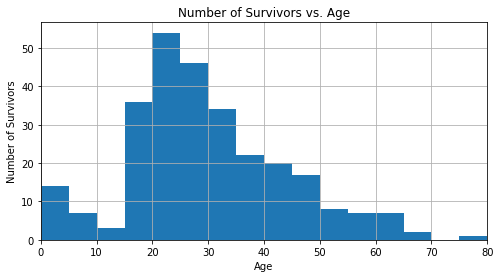

In [36]:
# Initialize figure and axis, from NB03
fig, axes = plt.subplots(figsize=(8,4))

# Setup bins
my_bins = range(0,85,5) # Max age of survivors is 80

# Plot
survivors.hist(column="Age", ax=axes, bins=my_bins);
axes.set_title("Number of Survivors vs. Age");
axes.set_xlabel("Age");
axes.set_ylabel("Number of Survivors");
axes.set_xlim([0,80]);

# Skewness
print("Mean: {0:0.3f}".format(survivors["Age"].mean()))
print("Median: {0:0.3f}".format(survivors["Age"].median()))

Since the mean is greater than the median, the distribution is positively skewed. The distribution is also bimodal, with very young children and young adults having the highest survival rate.

**Part F**: Were the median and mean ages for females who survived higher or lower than for females who did not survive?  

In [37]:
casualties = dfTitanic[dfTitanic['Survived'] == 0]

female_surv = survivors.loc[survivors["Sex"] == 'female', ["Age"]]
female_dead = casualties.loc[casualties["Sex"] == 'female', ["Age"]]

mean_surv = female_surv.mean()[0]
med_surv = female_surv.median()[0]
mean_dead = female_dead.mean()[0]
med_dead = female_dead.median()[0]

print("For female survivors, the mean age is {0:0.3f} \
and the median age is {1:1.0f}.".format(mean_surv, med_surv))
print("For female casualties, the mean age is {0:0.3f} \
and the median age is {1:1.0f}.".format(mean_dead, med_dead))

For female survivors, the mean age is 28.382 and the median age is 26.
For female casualties, the mean age is 28.957 and the median age is 29.


The females who survived were younger than those who did not, as measured by the mean and median.

**Part G**: Do the data suggest class warfare, male chivalry, or some combination of both characteristics in the final hours aboard the Titanic?  Justify your conclusion based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusion. 

Answer:

The data suggest that there was male chivalry, but not so much class warfare during the sinking of the titanic. This is because there is not a significant difference in the number of survivors in each class (the number of survivors in first class was equal to that in third class, all classes made up about a third of the survivors each). However, there is a bias toward female survivors (Part D) and younger survivors (Parts E and F). This suggests that the young and females had a higher chance of suvival and is evidence for male chivalry.

---
[Back to top](#top)